<center> Assignment 05 </center>

<center> 陈禹凡 12232261 </center>

In [1]:
import numpy as np
import pandas as pd
import datetime
import netCDF4
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from numpy import exp
import math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

## 1. Modeling of carbon cycle

In [2]:
CO2_data = pd.read_csv("Global Fossil-Fuel CO2 Emissions.csv")

In [3]:
#Mauna Loa 1986-2004数据
CO2_Mauna_1 = pd.read_csv("Mauna Loa CO2 annual mean data.csv")

### 1.1 

In [4]:
#model_1是方程1-2的计算
def model_1(z, t):
    x,y = z
    
    #k1,k2常数
    k1 = 105/740
    k2 = 102/900
    
    #c is the rate of production of CO2 by fossil-fuel burning
    a = CO2_data.loc[CO2_data['Year']== int(t)]['Total'].values
    c= a[0]/1000
    
    #偏微分方程组1-2
    dN1dt = -k1 * x + k2 * y + c
    dN2dt = k1 * x - k2 * y
    return [dN1dt,dN2dt]

#初始值
z0=[740,900]

#时间1986-2005
t = np.arange(1985,2005)

#integrate.odeint求解
f = integrate.odeint(model_1, z0, t)

#1987 - 2004年大气CO2浓度
f[2:,0]/2.13

array([349.77850999, 351.04809333, 352.39543217, 353.77221098,
       355.15238517, 356.54913362, 357.89747141, 359.22957711,
       360.60060843, 362.01846517, 363.47468504, 364.96005426,
       366.41277228, 367.82628922, 369.30342386, 370.83766208,
       372.37960382, 374.08459257])

### 1.2

In [5]:
#model_2是方程3-4的计算
def model_2(z, t):
    x,y = z
    
    #k1,k2,N20常数
    k1 = 105/740
    k2 = 102/900
    N20 = 821
    
    #q is buffer factor
    q= 3.69 + 0.0186 * x/2.13 - 1.8*(1e-6) * x * x/2.13/2.13
    
    #c is the rate of production of CO2 by fossil-fuel burning
    a = CO2_data.loc[CO2_data['Year']== int(t)]['Total'].values
    c= a[0]/1000
    
    #偏微分方程组1-2
    dN1dt = -k1 * x + k2 * (N20 + q*(y - N20)) + c
    dN2dt = k1 * x - k2 * (N20 + q*(y - N20))
    return [dN1dt,dN2dt]

#初始值
z0=[740,900]

#时间1986-2005
t = np.arange(1985,2005)

#integrate.odeint求解
g = integrate.odeint(model_2, z0, t)

#1987 - 2004年大气CO2浓度
g[2:,0]/2.13

array([378.98728653, 383.04052679, 386.0146096 , 388.7240129 ,
       391.37593291, 394.04500045, 396.68064862, 399.31457628,
       402.00075647, 404.7491574 , 407.55444184, 410.40988303,
       413.25358304, 416.07485387, 418.97394383, 421.94757915,
       424.94943065, 428.13941829])

### 1.3

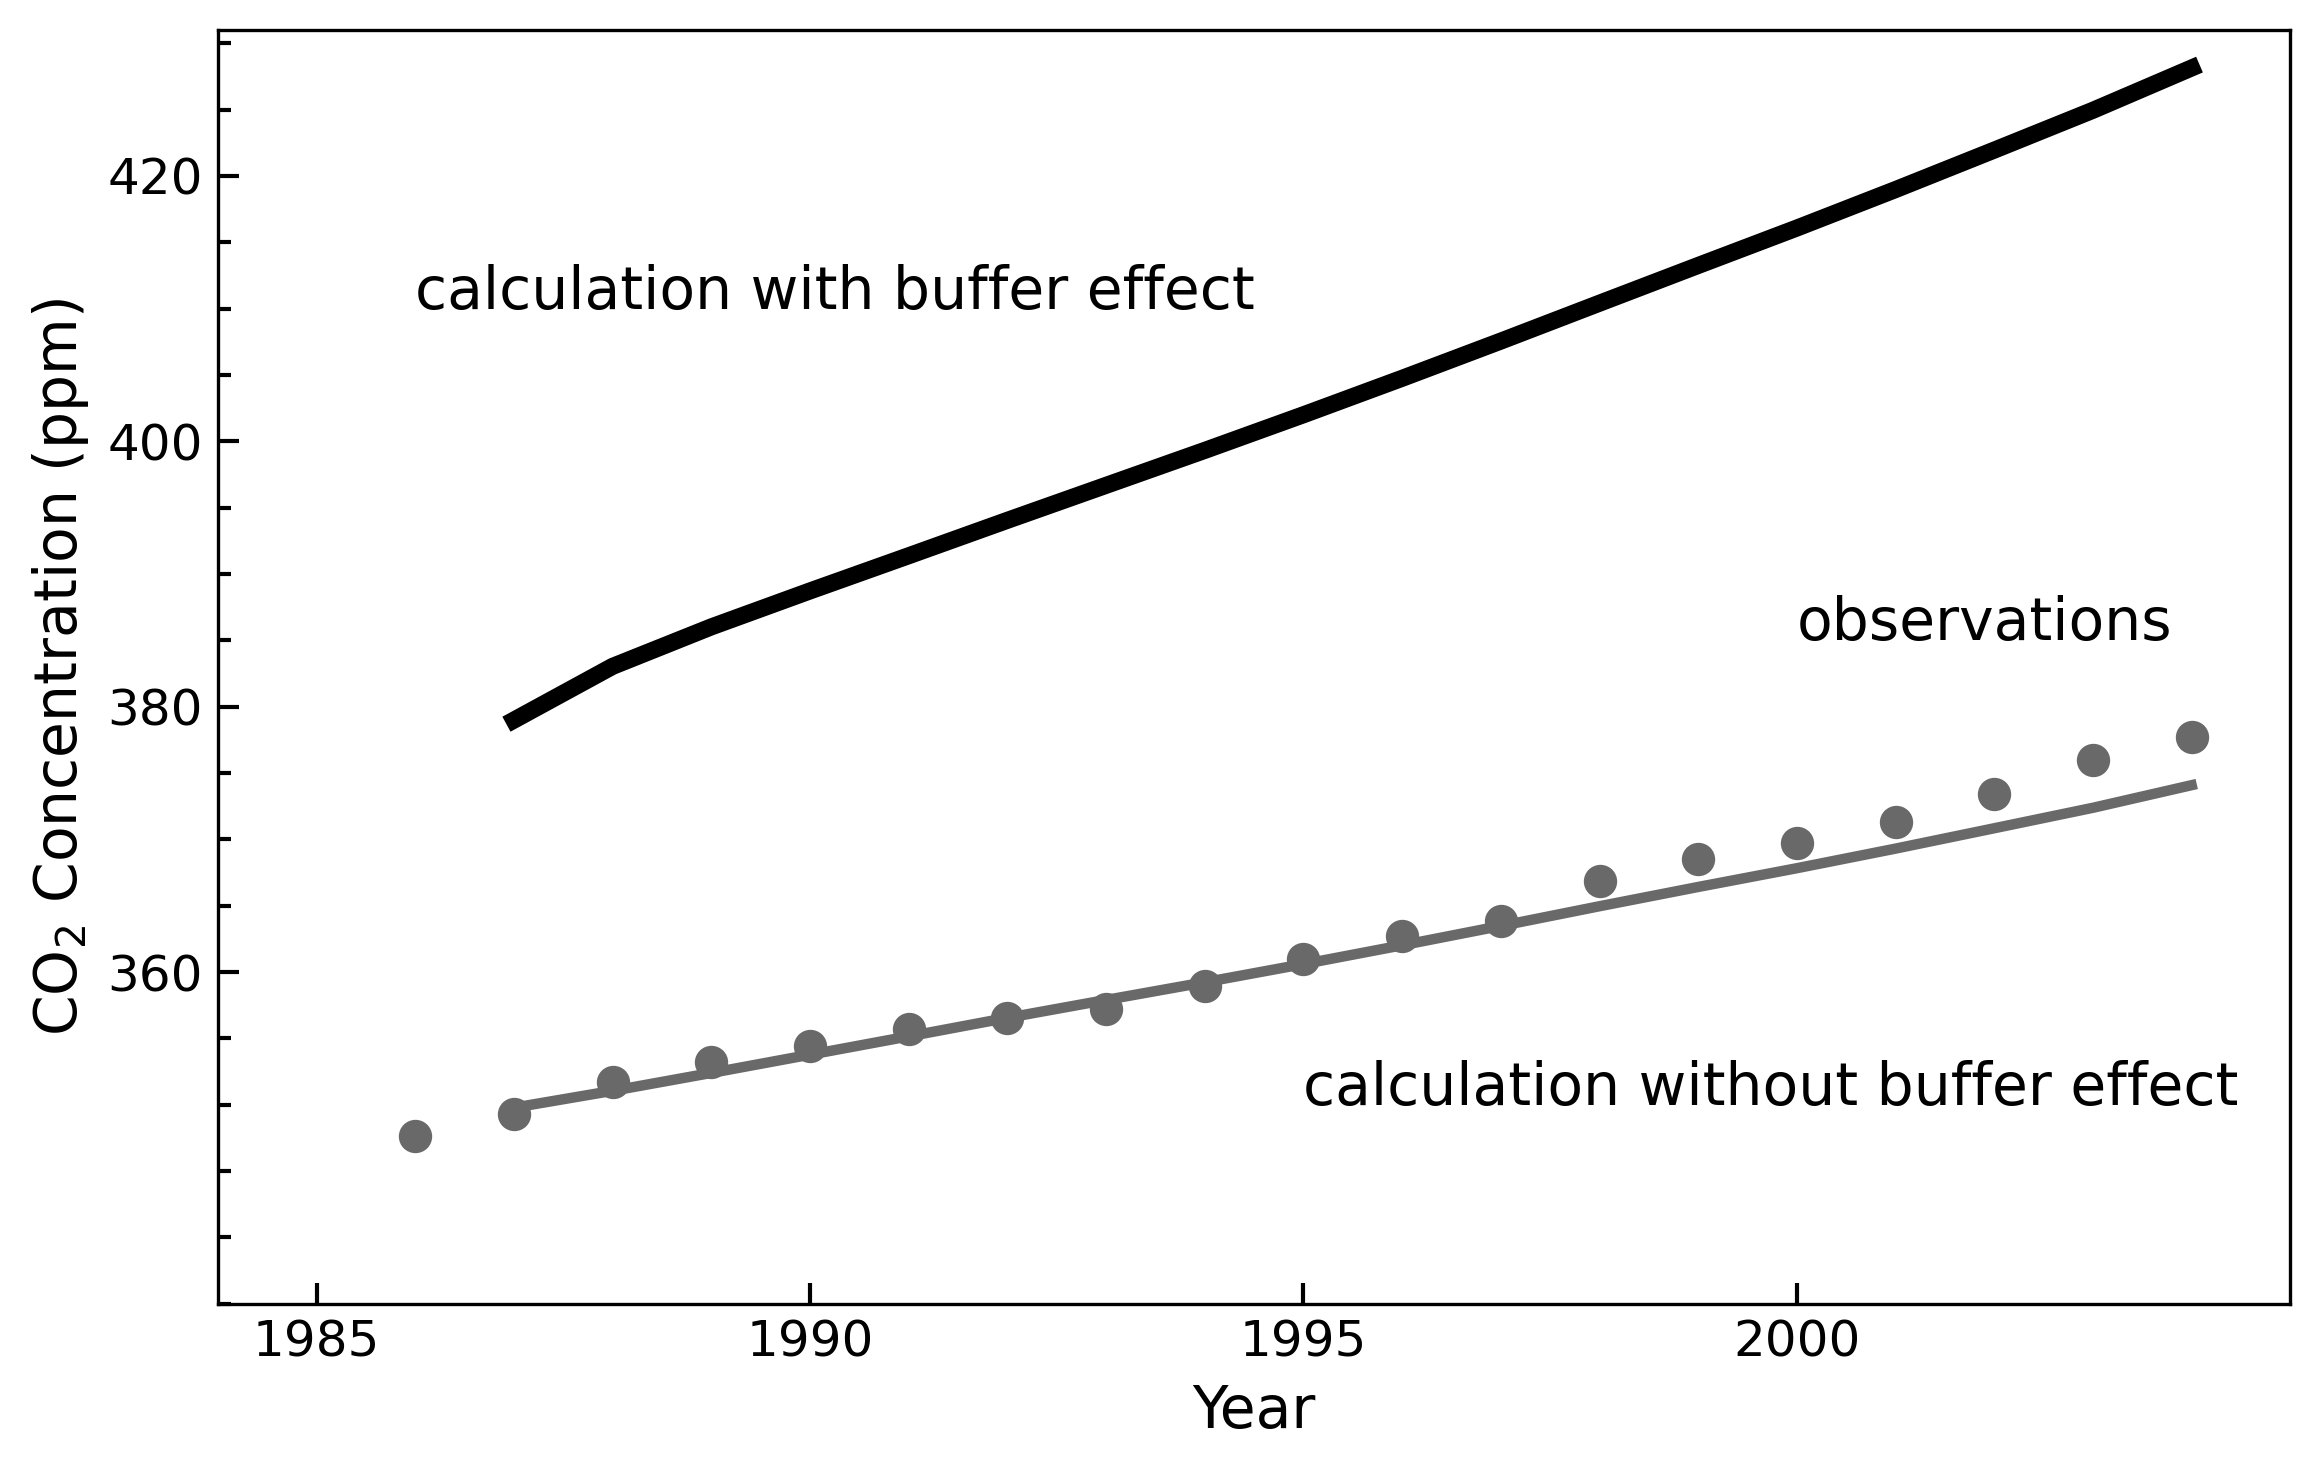

In [6]:
#绘图
fig,axm = plt.subplots(1,1,figsize = [8,5],dpi=300)

#分别将观测数据，以及公式1-2和3-4计算得到的数据绘制成图
t = np.arange(1987,2005)
axm.plot(CO2_Mauna_1['Year'],CO2_Mauna_1['PPM'],'o',color='#696969',markersize=7)
axm.plot(t, f[2:,0]/2.13,lw=2.5,color='#696969')
axm.plot(t, g[2:,0]/2.13,lw=4.1,color='k')

#设置y轴格式
axm.set_ylim(335,431)
axm.set_yticks([360,380,400,420])
axm.yaxis.set_minor_locator(MultipleLocator(5))

#设置x轴格式
axm.set_xlim(1984,2005)
axm.set_xticks([1985,1990,1995,2000])

#设置刻度轴样式
axm.tick_params(axis="both", which="major", direction="in", width=1, length=5,labelsize=12)
axm.tick_params(axis="both", which="minor", direction="in", width=1, length=3)

#x,y下标
axm.set_xlabel('Year',fontsize=14)
axm.set_ylabel('CO$_{2}$ Concentration (ppm)',fontsize=14)

#文本框
axm.text(2000,385,'observations',fontsize=14)
axm.text(1986,410,'calculation with buffer effect',fontsize=14)
axm.text(1995,350,'calculation without buffer effect',fontsize=14)

plt.tight_layout()
plt.show()

### Bonus

In [7]:
#观测数据由1750-1960的Historical CO2 Records from the Law Dome+1890-2000的Mauna Loa CO2 records数据组成
CO2_250years = pd.read_csv("CO2 for 250 years.csv")
CO2_250years

,Year,CO2
0,1750,277.00
1,1755,277.20
2,1760,277.60
3,1765,278.00
4,1770,278.60
...,...,...
79,1996,362.74
80,1997,363.88
81,1998,366.84
82,1999,368.54


In [8]:
#land_use数据在https://cdiac.ess-dive.lbl.gov/trends/landuse/houghton/houghton.html网站下载
land_use = pd.read_csv("Carbon to the Atmosphere from Land-Use Change.csv")

In [9]:
#model_3是方程5-13的计算（当The fertilization factor =0.38）
def model_3(z, t):
    a,s,d,g,h,j,p = z
    
    #k1,k2,N20常数
    k12 = 60/615
    k21 = 60/842
    k23 = 9/842
    k24 = 43/842
    k32 = 52/9744
    k34 = 162/9744
    k43 = 205/26280
    k45 = 0.2/26280
    k51 = 0.2/90000000
    k67 = 62/731
    k71 = 62/1328
    N20 = 821
    
    #q is buffer factor
    q= 3.69 + 0.0186 * a/2.13 - 1.8*(10**-6) * a * a/2.13/2.13

    
    #c is the rate of production of CO2 by fossil-fuel burning
    o = CO2_data.loc[CO2_data['Year']== int(t)]['Total'].values
    c= o[0]/1000
    
    #L is the emission rate to the atmosphere by changes in land use
    l = land_use.loc[land_use['Year']== int(t)]['Global'].values
    L =l[0]
    
    # f is the net primary productivity
    f = 62*(1+0.38*(np.log(a/615)))

    #偏微分方程组1-2
    dN1dt = -k12*a+k21*(N20 + q*(s - N20))+c-f+L+k51*h+k71*p
    dN2dt = k12*a-k21*(N20 + q*(s - N20))-k23*s+k32*d-k24*s
    dN3dt = k23*s-k32*d-k34*d+k43*g
    dN4dt = k34*d-k43*g+k24*s-k45*g
    dN5dt = k45*g-k51*h
    dN6dt = f-k67*j-2*L
    dN7dt = k67*j-k71*p+L
    return [dN1dt,dN2dt,dN3dt,dN4dt,dN5dt,dN6dt,dN7dt]

#初始值
z0=[615,842,9744,26280,90000000,731,1238]

#时间1986-2005
t = np.arange(1751,2001)

#integrate.odeint求解
r = integrate.odeint(model_3, z0, t,)

#1987 - 2004年大气CO2浓度
r[0:,0]/2.13

array([288.73239437, 290.98993005, 291.42659229, 291.09647968,
       290.47774969, 289.7833784 , 289.10577273, 288.48289614,
       287.92831767, 287.44470897, 287.03006128, 286.68041907,
       286.3911534 , 286.15750437, 285.97485371, 285.83878887,
       285.74517301, 285.69015907, 285.67015506, 285.68186114,
       285.7222271 , 285.78883146, 285.87860385, 285.9891603 ,
       286.11831843, 286.26408363, 286.42461154, 286.59821481,
       286.78338409, 286.97872612, 287.1829706 , 287.39541338,
       287.614532  , 287.83941946, 288.0692344 , 288.30321842,
       288.5406916 , 288.78104259, 289.02372761, 289.26826199,
       289.51421011, 289.76163672, 290.00971762, 290.25815731,
       290.50672074, 290.75516423, 291.00330214, 291.25138997,
       291.49880533, 291.74544721, 291.99164395, 292.23682719,
       292.48182051, 292.72516683, 292.96731268, 293.20823385,
       293.44835043, 293.68714583, 293.92462085, 294.16077374,
       294.39560347, 294.6295576 , 294.86215936, 295.09

In [10]:
#model_3是方程5-13的计算（当The fertilization factor =0.5）
def model_3(z, t):
    a,s,d,g,h,j,p = z
    
    #k1,k2,N20常数
    k12 = 60/615
    k21 = 60/842
    k23 = 9/842
    k24 = 43/842
    k32 = 52/9744
    k34 = 162/9744
    k43 = 205/26280
    k45 = 0.2/26280
    k51 = 0.2/90000000
    k67 = 62/731
    k71 = 62/1328
    N20 = 821
    
    #q is buffer factor
    q= 3.69 + 0.0186 * a/2.13 - 1.8*(10**-6) * a * a/2.13/2.13

    
    #c is the rate of production of CO2 by fossil-fuel burning
    o = CO2_data.loc[CO2_data['Year']== int(t)]['Total'].values
    c= o[0]/1000
    
    #L is the emission rate to the atmosphere by changes in land use
    l = land_use.loc[land_use['Year']== int(t)]['Global'].values
    L =l[0]
    
    # f is the net primary productivity
    f = 62*(1+0.5*(np.log(a/615)))

    #偏微分方程组1-2
    dN1dt = -k12*a+k21*(N20 + q*(s - N20))+c-f+L+k51*h+k71*p
    dN2dt = k12*a-k21*(N20 + q*(s - N20))-k23*s+k32*d-k24*s
    dN3dt = k23*s-k32*d-k34*d+k43*g
    dN4dt = k34*d-k43*g+k24*s-k45*g
    dN5dt = k45*g-k51*h
    dN6dt = f-k67*j-2*L
    dN7dt = k67*j-k71*p+L
    return [dN1dt,dN2dt,dN3dt,dN4dt,dN5dt,dN6dt,dN7dt]

#初始值
z0=[615,842,9744,26280,90000000,731,1238]

#时间1986-2005
t = np.arange(1751,2001)

#integrate.odeint求解
v = integrate.odeint(model_3, z0, t,)

#1987 - 2004年大气CO2浓度
v[0:,0]/2.13

array([288.73239437, 290.9743773 , 291.38349856, 291.02843613,
       290.3923209 , 289.68919475, 289.01098516, 288.39463581,
       287.85252093, 287.38620104, 286.99257934, 286.66671959,
       286.40310504, 286.19626122, 286.0408252 , 285.93180624,
       285.8645929 , 285.83488815, 285.83873566, 285.87253542,
       285.93298665, 286.01750833, 286.12286873, 286.24660353,
       286.38645849, 286.54038908, 286.70656287, 286.88332303,
       287.06917177, 287.26278637, 287.4629662 , 287.66909173,
       287.87974481, 288.09410074, 288.31142513, 288.53106302,
       288.75245056, 288.97507793, 289.19852057, 289.42239467,
       289.64637915, 289.87062644, 290.09443732, 290.31761925,
       290.54000113, 290.76144518, 290.98185616, 291.20156865,
       291.42003432, 291.63721265, 291.85350945, 292.06841394,
       292.28281099, 292.49528748, 292.70636351, 292.91605284,
       293.12480591, 293.33216456, 293.53815311, 293.74279842,
       293.94614968, 294.14867206, 294.34991173, 294.54

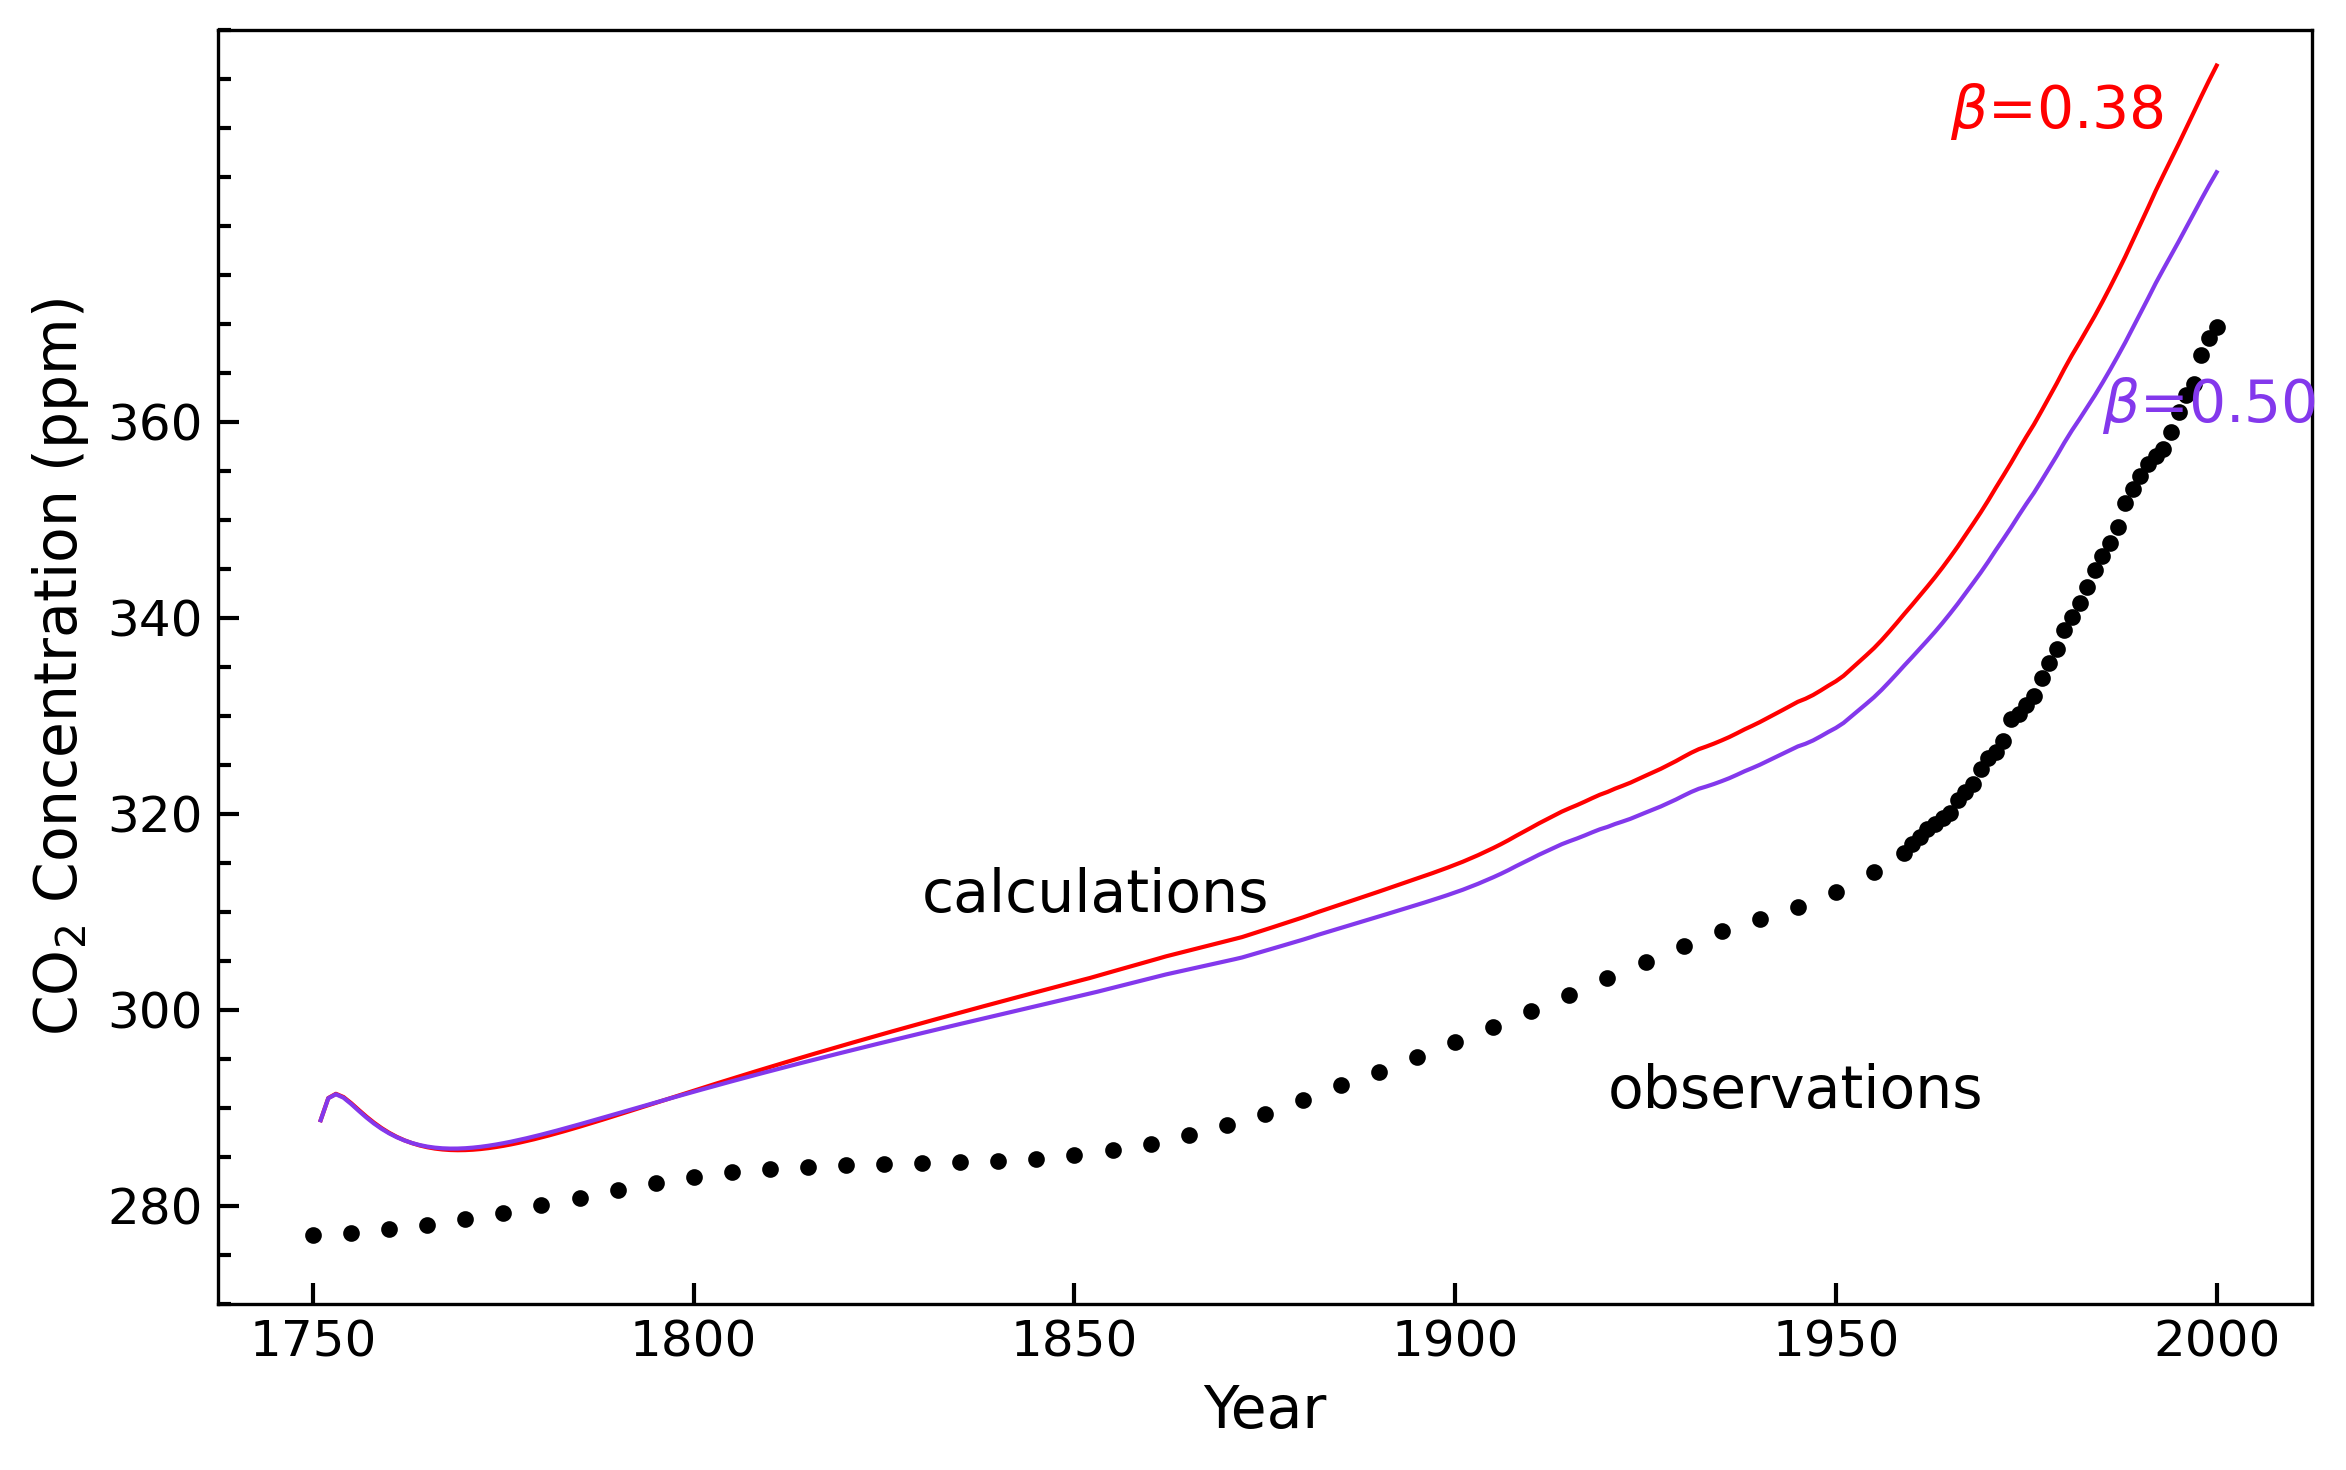

In [11]:
fig,ax = plt.subplots(1,1,figsize = [8,5],dpi=300)

#观测值数据
ax.plot(CO2_250years['Year'],CO2_250years['CO2'],'ko',markersize=3)

#计算数据
t = np.arange(1751,2001)
ax.plot(t, r[0:,0]/2.13 ,'red',lw=1) #The fertilization factor = 0.38
ax.plot(t, v[0:,0]/2.13, '#8338ec',lw=1) #The fertilization factor = 0.5

#x,y下标
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('CO$_{2}$ Concentration (ppm)',fontsize=14)

#坐标轴设置
ax.tick_params(axis="both", which="major", direction="in", width=1, length=5,labelsize=12)
ax.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
ax.set_ylim(270,400)
ax.set_yticks([280,300,320,340,360])
ax.yaxis.set_minor_locator(MultipleLocator(5))

#文本框
ax.text(1920,290,'observations',fontsize=14)
ax.text(1830,310,'calculations',fontsize=14)
ax.text(1965,390,r'$\beta$'+'=0.38',color = 'red',fontsize=14)
ax.text(1985,360,r'$\beta$'+'=0.50',color = '#8338ec',fontsize=14)

plt.tight_layout()
plt.show()

### 我所计算拟合出来的结果与文献以及真实值有所差距，这可能与参数、数据或方法有关。但自己也检查思考了许久都未发现问题所在，因此将最后的结果成图。